✅ Dataset Loaded Successfully!
Shape: (1988, 40)

📊 Baseline KNN (All Features):
Accuracy : 0.9724
Precision: 0.4000
Recall   : 0.2000
F1 Score : 0.2667
AUC      : 0.6747

🚀 LOA Optimization Started...

Iteration 1/150 -> Best Fitness: 0.0226
Iteration 21/150 -> Best Fitness: 0.0176
Iteration 41/150 -> Best Fitness: 0.0176
Iteration 61/150 -> Best Fitness: 0.0176
Iteration 81/150 -> Best Fitness: 0.0176
Iteration 101/150 -> Best Fitness: 0.0176
Iteration 121/150 -> Best Fitness: 0.0176
Iteration 141/150 -> Best Fitness: 0.0176
Iteration 150/150 -> Best Fitness: 0.0176

✅ LOA Optimization Completed!

🎯 Selected 26 features out of 38:
['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'GLOBAL_DATA_COMPLEXITY', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HAL

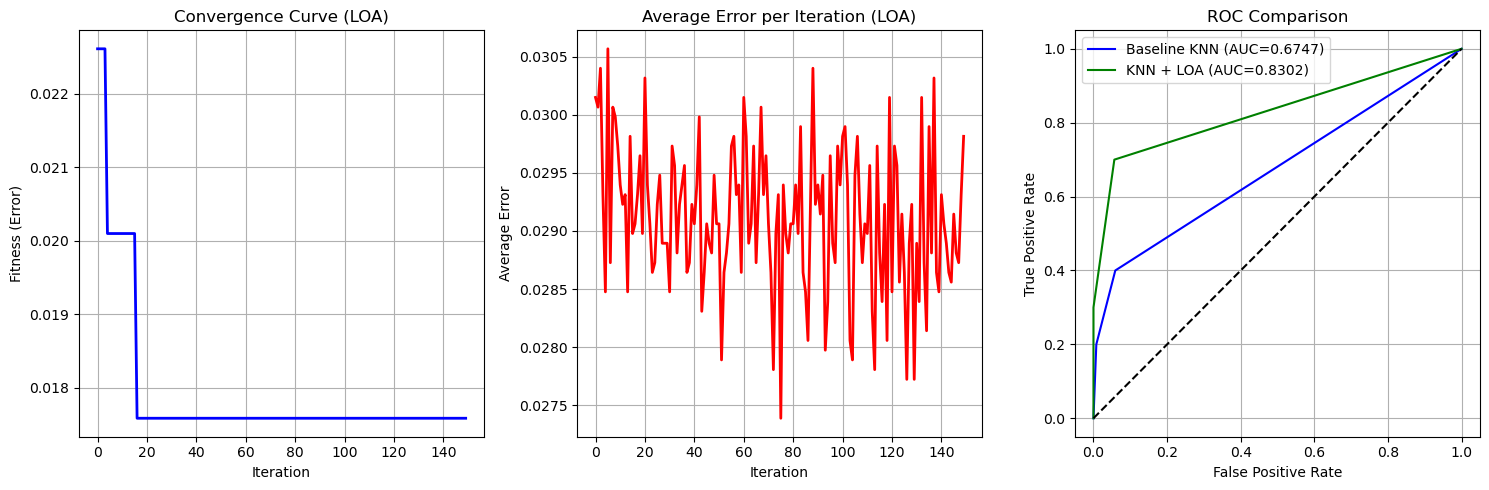

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Load dataset (replace with your local path)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\project\mc1_csv.csv")  # Ensure this file is in the same directory

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {data.shape}")

# Separate features and target
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

# Drop 'id' column if exists
if 'id' in X.columns:
    X.drop('id', axis=1, inplace=True)

# Normalize data
scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Dim = X_train.shape[1]

# Baseline: KNN without Feature Selection
knn_base = KNeighborsClassifier(n_neighbors=3)
knn_base.fit(X_train, y_train)
pred_base = knn_base.predict(X_test)

# For AUC, encode y_test
le = preprocessing.LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
# For AUC, encode y_test
le = preprocessing.LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
prob_base = knn_base.predict_proba(X_test)[:, le.transform(['Y'])[0]]

# Compute Metrics
acc_base = accuracy_score(y_test, pred_base)
prec_base = precision_score(y_test, pred_base, pos_label='Y')
rec_base = recall_score(y_test, pred_base, pos_label='Y')
f1_base = f1_score(y_test, pred_base, pos_label='Y')
auc_base = roc_auc_score(y_test_encoded, prob_base)
# (Removed duplicate and out-of-place block that used selected_idx before definition)

# Compute Metrics
acc_base = accuracy_score(y_test, pred_base)
prec_base = precision_score(y_test, pred_base, pos_label='Y')
rec_base = recall_score(y_test, pred_base, pos_label='Y')
f1_base = f1_score(y_test, pred_base, pos_label='Y')
auc_base = roc_auc_score(y_test_encoded, prob_base)

print("\n📊 Baseline KNN (All Features):")
print(f"Accuracy : {acc_base:.4f}")
print(f"Precision: {prec_base:.4f}")
print(f"Recall   : {rec_base:.4f}")
print(f"F1 Score : {f1_base:.4f}")
print(f"AUC      : {auc_base:.4f}")

# Lyrebird Optimization Algorithm (LOA) for Feature Selection
def fitness_function(features):
    selected = np.where(features == 1)[0]
    if len(selected) == 0:
        return 1.0  # worst case if no feature selected
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train.iloc[:, selected], le.transform(y_train))
    pred = knn.predict(X_test.iloc[:, selected])
    acc = np.mean(pred == y_test_encoded)
    return 1 - acc  # minimize classification error

def LOA_feature_selection(Dim, MaxIter=150, N=30):
    # Initialize population
    X_pop = np.random.randint(0, 2, (N, Dim))
    Fitness = np.zeros(N)

    # Parameters
    alpha, beta, gamma = 0.5, 0.8, 0.9

    # Initialize best
    Best_FF = np.inf
    Best_P = np.zeros(Dim)

    # Evaluate initial population
    for i in range(N):
        Fitness[i] = fitness_function(X_pop[i])
        if Fitness[i] < Best_FF:
            Best_FF = Fitness[i]
            Best_P = X_pop[i].copy()

    Conv_curve = np.zeros(MaxIter)
    Avg_error_curve = np.zeros(MaxIter)

    print("\n🚀 LOA Optimization Started...\n")

    for t in range(MaxIter):
        errors = []
        for i in range(N):
            # Lyrebird position update
            A = alpha * np.random.uniform(-1, 1, Dim)
            B = beta * np.random.uniform(0, 1, Dim)
            C = gamma * np.random.uniform(0, 1)

            new_pos = X_pop[i] + A * (Best_P - B * X_pop[i]) + C * np.random.randn(Dim)
            new_pos = 1 / (1 + np.exp(-new_pos))
            new_pos = np.where(new_pos > 0.5, 1, 0)

            new_fit = fitness_function(new_pos)
            errors.append(new_fit)

            # Greedy selection
            if new_fit < Fitness[i]:
                X_pop[i] = new_pos.copy()
                Fitness[i] = new_fit

            if new_fit < Best_FF:
                Best_FF = new_fit
                Best_P = new_pos.copy()

        Conv_curve[t] = Best_FF
        Avg_error_curve[t] = np.mean(errors)

        if t % 20 == 0 or t == MaxIter - 1:
            print(f"Iteration {t+1}/{MaxIter} -> Best Fitness: {Best_FF:.4f}")

    print("\n✅ LOA Optimization Completed!")
    return Best_P, Best_FF, Conv_curve, Avg_error_curve

# Run LOA for Feature Selection
Best_features, Best_error, Conv_curve, Avg_error_curve = LOA_feature_selection(Dim=Dim, MaxIter=150, N=30)
selected_idx = np.where(Best_features == 1)[0]

print(f"\n🎯 Selected {len(selected_idx)} features out of {Dim}:")
print(list(X_train.columns[selected_idx]))

# Final KNN with LOA Selected Features
knn_loa = KNeighborsClassifier(n_neighbors=3)
knn_loa.fit(X_train.iloc[:, selected_idx], y_train)
pred_loa = knn_loa.predict(X_test.iloc[:, selected_idx])
prob_loa = knn_loa.predict_proba(X_test.iloc[:, selected_idx])[:, le.transform(['Y'])[0]]

# Metrics
acc_loa = accuracy_score(y_test, pred_loa)
prec_loa = precision_score(y_test, pred_loa, pos_label='Y')
rec_loa = recall_score(y_test, pred_loa, pos_label='Y')
f1_loa = f1_score(y_test, pred_loa, pos_label='Y')
auc_loa = roc_auc_score(y_test_encoded, prob_loa)

print("\n📊 KNN + LOA Feature Selection:")
print(f"Accuracy : {acc_loa:.4f}")
print(f"Precision: {prec_loa:.4f}")
print(f"Recall   : {rec_loa:.4f}")
print(f"F1 Score : {f1_loa:.4f}")
print(f"AUC      : {auc_loa:.4f}")

# Comparison Table
results = pd.DataFrame({
    "Model": ["KNN (All Features)", "KNN + LOA (Selected Features)"],
    "Accuracy": [acc_base, acc_loa],
    "Precision": [prec_base, prec_loa],
    "Recall": [rec_base, rec_loa],
    "F1-Score": [f1_base, f1_loa],
    "AUC": [auc_base, auc_loa]
})
print("\n📈 Comparison of KNN With & Without LOA:\n")
print(results.to_string(index=False))

# Visualization
plt.figure(figsize=(15, 5))

# Convergence Plot
plt.subplot(1, 3, 1)
plt.plot(Conv_curve, 'b-', linewidth=2)
plt.title("Convergence Curve (LOA)")
plt.xlabel("Iteration")
plt.ylabel("Fitness (Error)")
plt.grid(True)

# Average Error Plot
plt.subplot(1, 3, 2)
plt.plot(Avg_error_curve, 'r-', linewidth=2)
plt.title("Average Error per Iteration (LOA)")
plt.xlabel("Iteration")
plt.ylabel("Average Error")
plt.grid(True)

# ROC Curves
fpr_base, tpr_base, _ = roc_curve(y_test_encoded, prob_base)
fpr_loa, tpr_loa, _ = roc_curve(y_test_encoded, prob_loa)

plt.subplot(1, 3, 3)
plt.plot(fpr_base, tpr_base, 'b-', label=f'Baseline KNN (AUC={auc_base:.4f})')
plt.plot(fpr_loa, tpr_loa, 'g-', label=f'KNN + LOA (AUC={auc_loa:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
